# Import dependencies and load data

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib 
import math
from matplotlib.ticker import FuncFormatter
from scipy import stats
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

'''
192.168.0.24: intensity context (old task), INTENSITY context (new task)
192.168.0.29: click rate task (old task), sweep direction (new task)
'''

'\n192.168.0.24: intensity context (old task), INTENSITY context (new task)\n192.168.0.29: click rate task (old task), sweep direction (new task)\n'

In [36]:
ALL = pd.read_csv("data/ALL_6.20.25.csv").iloc[:,1:]
ALL = ALL.dropna()
ALL['times'] = pd.to_datetime(ALL['times'],format='%Y-%m-%d %H:%M:%S.%f',)             # any bad rows become NaT
ALL['day'] = ALL['times'].dt.normalize()   # midnight of each day
subject_IDs = np.sort(ALL.subjects.unique())
all_days = ALL["day"].dt.date.unique()

# find the two tasks
INTENSITY = ALL[ALL.task == 24].reset_index(drop=True)
CLICKS = ALL[ALL.task == 29].reset_index(drop=True)

# Filter out the contaminated trials (approx. 500 trials)
# INTENSITY = INTENSITY[500:]
CLICKS = CLICKS[500:]
ALL = pd.concat([INTENSITY, CLICKS]).reset_index(drop=True)

In [37]:
# sanity check if the two rules are correct in the filtered data
# should have only two unique stimuli for each actioni in each rule
I_right = INTENSITY.loc[
    INTENSITY['trial_types'] == 1, 
    'specific_stims'
].unique()
I_left = INTENSITY.loc[
    INTENSITY['trial_types'] == 0, 
    'specific_stims'
].unique()
print(I_right)
print(I_left)

CR_right = CLICKS.loc[
    CLICKS['trial_types'] == 1, 
    'specific_stims'
].unique()
CR_left = CLICKS.loc[
    CLICKS['trial_types'] == 0, 
    'specific_stims'
].unique()
print(CR_right)
print(CR_left)

['clicks_12hz_1s_60db.wav' 'clicks_32hz_1s_60db.wav']
['clicks_12hz_1s_70db.wav' 'clicks_32hz_1s_70db.wav']
['clicks_12hz_1s_60db.wav' 'clicks_12hz_1s_70db.wav']
['clicks_32hz_1s_70db.wav' 'clicks_32hz_1s_60db.wav']


In [38]:
#                      I LOW 60 (RIGHT)           I HIGHT 70 (LEFT)        
# CR LOW 12 (RIGHT)     (context-invariant)       (context-dependent)
# CR HIGH 32 (LEFT)     (context-dependent)       (context-invariant)  

# the invariant stimuli are: 'clicks_12hz_1s_60db.wav', 'clicks_32hz_1s_70db.wav'
# the context-dependent stimuli are: 'clicks_12hz_1s_70db.wav', 'clicks_32hz_1s_60db.wav' 

In [39]:
# load context-dependent and invariant trials for each task
INVARIANT_INTENSITY = INTENSITY[
    (INTENSITY['specific_stims'] == 'clicks_12hz_1s_60db.wav')
    | 
    (INTENSITY['specific_stims'] == 'clicks_32hz_1s_70db.wav')
]
DEPENDENT_INTENSITY = INTENSITY[
    (INTENSITY['specific_stims'] == 'clicks_12hz_1s_70db.wav')
    | 
    (INTENSITY['specific_stims'] == 'clicks_32hz_1s_60db.wav')
]

INVARIANT_CLICKS = CLICKS[
    (CLICKS['specific_stims'] == 'clicks_12hz_1s_60db.wav')
    | 
    (CLICKS['specific_stims'] == 'clicks_32hz_1s_70db.wav')
]
DEPENDENT_CLICKS = CLICKS[
    (CLICKS['specific_stims'] == 'clicks_12hz_1s_70db.wav')
    | 
    (CLICKS['specific_stims'] == 'clicks_32hz_1s_60db.wav')
]

In [40]:
colors = ['#FFC07F', # Arena A -> intensity 
          '#94c47d', #  Arena B
          '#4AA9FC', # context-dep
          "#A1A7B0"] # context-inv

# plot the overall performance in both tasks

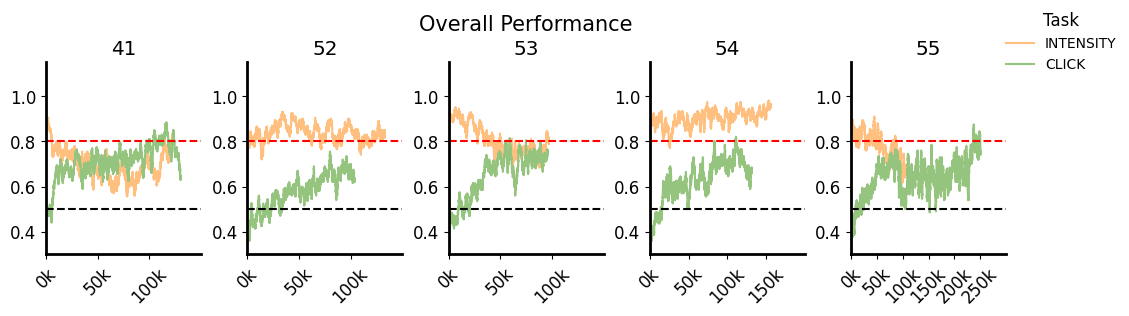

In [ ]:
# plot the overall performance in both tasks
fig = plt.figure(figsize=(12, 6))
roll_size = 200
import matplotlib 
import math
matplotlib.rcParams['font.size'] = 12
idx = 1
for subject in subject_IDs:
    ax = plt.subplot(2, 5, idx)
    sub_intensity = INTENSITY.loc[INTENSITY.subjects == subject].reset_index(drop=True)
    sub_intensity.outcomes.rolling(roll_size).mean().plot(axes[idx]es[idx]es[idx]es[idx]es[idx]es[idx]=ax,label="INTENSITY", color=colors[0])
    sub_clicks = CLICKS.loc[CLICKS.subjects == subject].reset_index(drop=True)
    sub_clicks.outcomes.rolling(roll_size).mean().plot(ax=ax,label="CLICK", color=colors[1])
    plt.title(f'{str(subject)[-2:]}')
    idx += 1
    ax.axhline(0.8, color='red', ls='--')
    ax.axhline(0.5, color='black', ls='--')
    x_max = max(len(sub_intensity), len(sub_clicks))
    if x_max < 15000:
        lim_x = 15000
    else:
        lim_x = math.ceil(x_max / 5000) * 5000
    ax.set_xlim(0, lim_x) 
    ax.set_xticks(np.arange(0, lim_x+1, 5000))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: f'{x/100:.0f}k'))
    last_tick  = ax.xaxis.get_major_ticks()[-1]   # grab final Tick object
    last_tick.set_visible(False)
    ax.set_ylim(0.3, 1.15)  
    ax.set_yticks(np.arange(0.4, 1.1, 0.2))

    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.subplots_adjust(
    hspace=0.5,    # increase vertical padding between rows
    wspace=0.3,    # horizontal padding (if multiple columns)
    top=0.9,       # leave 10% space at top
    bottom=0.1,    # leave 10% space at bottom
    left=0.1,      # 10% margin on left
    right=0.9      # 10% margin on right
)
plt.suptitle('Overall Performance', fontsize=15)
handles, labels = ax.get_legend_handles_labels()

# add a single legend for the whole figure
fig.legend(
    handles,
    labels,
    loc='upper right',    # position above all subplots
    ncol=1,                # number of columns in the legend
    title='Task',
    fontsize = 10,
    frameon = False
)
plt.show()

# Plot Performance day by day

**Overall**

/var/folders/nn/8m_833q103bgc9nrgbf5_d500000gn/T/ipykernel_83160/3695069474.py:69: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


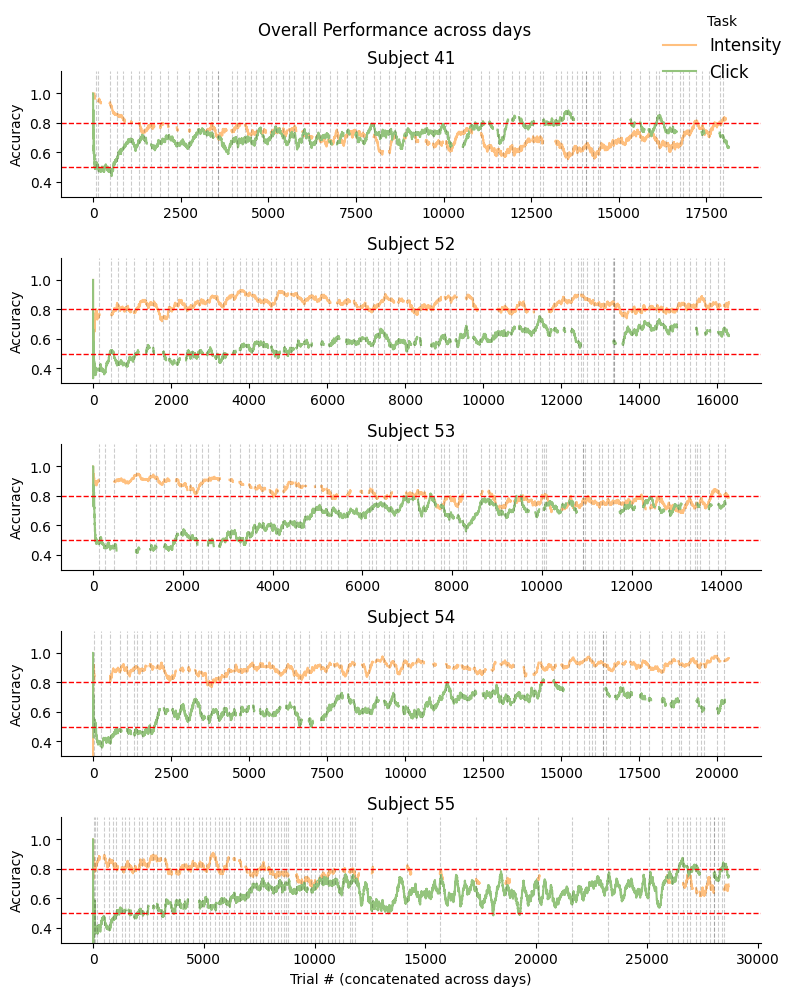

In [ ]:
roll_size = 200
matplotlib.rcParams['font.size'] = 10

fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 10), constrained_layout = True)

for idx, subject in enumerate(subject_IDs):

    offset = 0                               # how many trials have we already placed?
    boundaries = []                          # collect (x-pos, date) tuples for later

    subject_data_Intensity = INTENSITY.loc[INTENSITY .subjects == subject].reset_index(drop=True)
    subject_data_CR = CLICKS.loc[CLICKS .subjects == subject].reset_index(drop=True)

    subject_data_Intensity['roll_means'] = subject_data_Intensity.outcomes.rolling(roll_size, min_periods=1).mean()
    subject_data_CR['roll_means'] = subject_data_CR.outcomes.rolling(roll_size, min_periods=1).mean()

    for day in all_days:                     # ⬅  make sure this list is chronological
        # --- slice one day ------------------------------------------------------
        sub_I  = subject_data_Intensity.loc[subject_data_Intensity.day.dt.date == day].reset_index(drop=True)
        sub_cr = subject_data_CR.loc[subject_data_CR.day.dt.date == day].reset_index(drop=True)

        # x coordinates shifted by the cumulative offset
        x_i   = np.arange(offset, offset + len(sub_I))
        x_cr= np.arange(offset, offset + len(sub_cr))

        # --- plot the two tasks -------------------------------------------------
        if offset == 0:
            axes[idx].plot(x_i, sub_I.roll_means,   color=colors[0], label="Intensity")
            axes[idx].plot(x_cr, sub_cr.roll_means, color=colors[1], label="ClickRate")
        else:
            axes[idx].plot(x_i,  sub_I.roll_means,   color=colors[0])
            axes[idx].plot(x_cr, sub_cr.roll_means, color=colors[1])

        # --- prepare next loop --------------------------------------------------
        offset += max(len(sub_I), len(sub_cr))     # where next day will start
        boundaries.append((offset, day))                # remember this end position

    # ---------------------------------------------------------------------------
    # Draw vertical lines and put the date right above each one
    y_top = axes[idx].get_ylim()[1]          # current upper y-limit
    for x_pos, day in boundaries[:-1]:    # skip final boundary (end of last day)
        axes[idx].axvline(x_pos, color='k', lw=0.8, alpha=0.2, linestyle = '--')

    axes[idx].axhline(0.8, color='red', ls='--', lw=1)
    axes[idx].axhline(0.5, color='red', ls='--', lw=1)

    axes[idx].set_ylim(0.3, 1.15)
    axes[idx].set_yticks(np.arange(0.4, 1.1, 0.2))

    if idx == len(subject_IDs)-1:
        axes[idx].set_xlabel('Trial # (concatenated across days)')
    axes[idx].set_ylabel('Accuracy')
    axes[idx].set_title(f'Subject {str(subject)[-2:]}')

    # axes[idx].legend(frameon=False, loc='upper right', fontsize = 10)
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['right'].set_visible(False)

fig.suptitle('Overall Performance across days')
fig.legend(
    ['Intensity', 'Click'],
    loc='upper right',    # position above all subplots
    ncol=1,                # number of columns in the legend
    fontsize = 12,
    frameon = False
)

fig.tight_layout()
plt.show()

**Invariant**

/var/folders/nn/8m_833q103bgc9nrgbf5_d500000gn/T/ipykernel_83160/3912297075.py:69: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


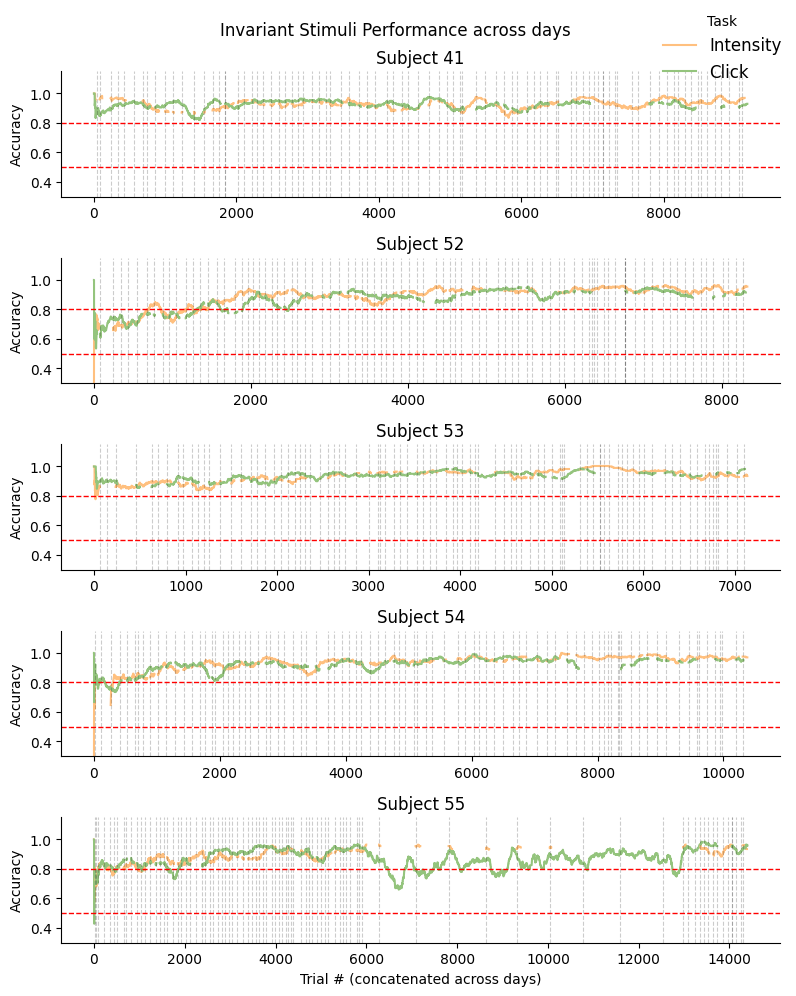

In [23]:
roll_size = 200
matplotlib.rcParams['font.size'] = 10

fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 10), constrained_layout = True)

for idx, subject in enumerate(subject_IDs):

    offset = 0                               # how many trials have we already placed?
    boundaries = []                          # collect (x-pos, date) tuples for later

    subject_data_Intensity = INVARIANT_INTENSITY.loc[INVARIANT_INTENSITY.subjects == subject].reset_index(drop=True)
    subject_data_CR = INVARIANT_CLICKS.loc[INVARIANT_CLICKS.subjects == subject].reset_index(drop=True)

    subject_data_Intensity['roll_means'] = subject_data_Intensity.outcomes.rolling(roll_size, min_periods=1).mean()
    subject_data_CR['roll_means'] = subject_data_CR.outcomes.rolling(roll_size, min_periods=1).mean()

    for day in all_days:                     # ⬅  make sure this list is chronological
        # --- slice one day ------------------------------------------------------
        sub_I  = subject_data_Intensity.loc[subject_data_Intensity.day.dt.date == day].reset_index(drop=True)
        sub_cr = subject_data_CR.loc[subject_data_CR.day.dt.date == day].reset_index(drop=True)

        # x coordinates shifted by the cumulative offset
        x_i   = np.arange(offset, offset + len(sub_I))
        x_cr= np.arange(offset, offset + len(sub_cr))

        # --- plot the two tasks -------------------------------------------------
        if offset == 0:
            axes[idx].plot(x_i, sub_I.roll_means,   color=colors[0], label="Intensity")
            axes[idx].plot(x_cr, sub_cr.roll_means, color=colors[1], label="ClickRate")
        else:
            axes[idx].plot(x_i,  sub_I.roll_means,   color=colors[0])
            axes[idx].plot(x_cr, sub_cr.roll_means, color=colors[1])

        # --- prepare next loop --------------------------------------------------
        offset += max(len(sub_I), len(sub_cr))     # where next day will start
        boundaries.append((offset, day))                # remember this end position

    # ---------------------------------------------------------------------------
    # Draw vertical lines and put the date right above each one
    y_top = axes[idx].get_ylim()[1]          # current upper y-limit
    for x_pos, day in boundaries[:-1]:    # skip final boundary (end of last day)
        axes[idx].axvline(x_pos, color='k', lw=0.8, alpha=0.2, linestyle = '--')

    axes[idx].axhline(0.8, color='red', ls='--', lw=1)
    axes[idx].axhline(0.5, color='red', ls='--', lw=1)

    axes[idx].set_ylim(0.3, 1.15)
    axes[idx].set_yticks(np.arange(0.4, 1.1, 0.2))

    if idx == len(subject_IDs)-1:
        axes[idx].set_xlabel('Trial # (concatenated across days)')
    axes[idx].set_ylabel('Accuracy')
    axes[idx].set_title(f'Subject {str(subject)[-2:]}')

    # axes[idx].legend(frameon=False, loc='upper right', fontsize = 10)
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['right'].set_visible(False)

fig.suptitle('Invariant Stimuli Performance across days')
fig.legend(
    ['Intensity', 'Click'],
    loc='upper right',    # position above all subplots
    ncol=1,                # number of columns in the legend
    title='Task',
    fontsize = 12,
    frameon = False
)

fig.tight_layout()
plt.show()

**Dependent**

/var/folders/nn/8m_833q103bgc9nrgbf5_d500000gn/T/ipykernel_83160/698188184.py:69: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


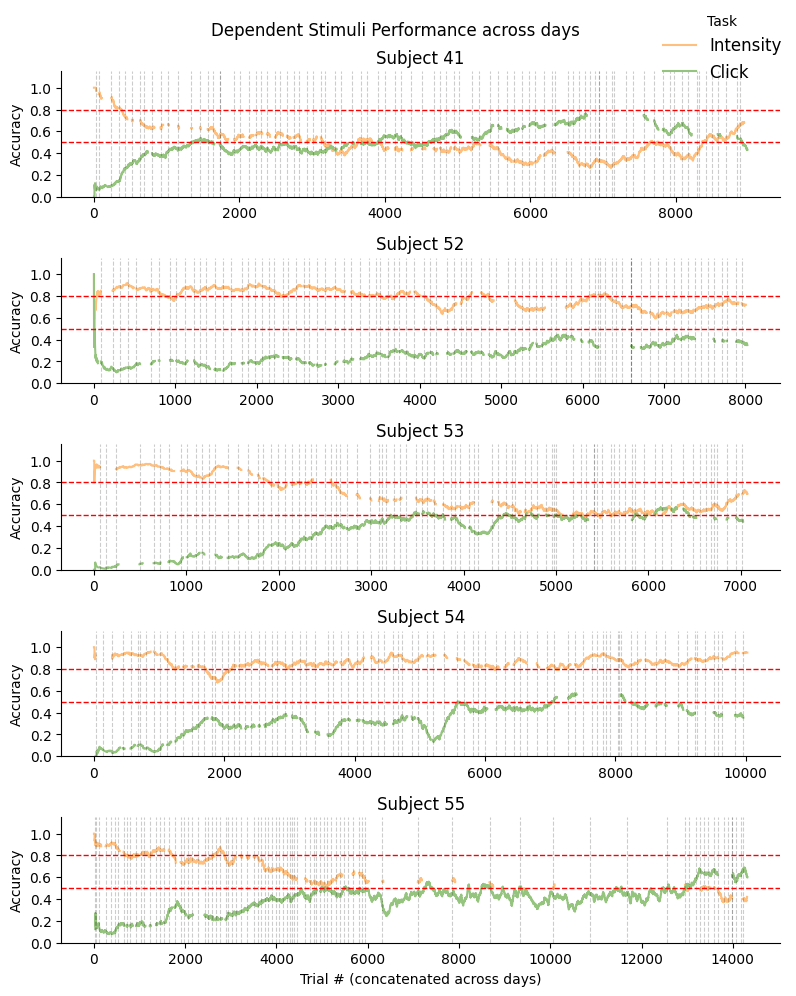

In [25]:
roll_size = 200
matplotlib.rcParams['font.size'] = 10

fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 10), constrained_layout = True)

for idx, subject in enumerate(subject_IDs):

    offset = 0                               # how many trials have we already placed?
    boundaries = []                          # collect (x-pos, date) tuples for later

    subject_data_Intensity = DEPENDENT_INTENSITY.loc[DEPENDENT_INTENSITY.subjects == subject].reset_index(drop=True)
    subject_data_CR = DEPENDENT_CLICKS.loc[DEPENDENT_CLICKS.subjects == subject].reset_index(drop=True)

    subject_data_Intensity['roll_means'] = subject_data_Intensity.outcomes.rolling(roll_size, min_periods=1).mean()
    subject_data_CR['roll_means'] = subject_data_CR.outcomes.rolling(roll_size, min_periods=1).mean()

    for day in all_days:                     # ⬅  make sure this list is chronological
        # --- slice one day ------------------------------------------------------
        sub_I  = subject_data_Intensity.loc[subject_data_Intensity.day.dt.date == day].reset_index(drop=True)
        sub_cr = subject_data_CR.loc[subject_data_CR.day.dt.date == day].reset_index(drop=True)

        # x coordinates shifted by the cumulative offset
        x_i   = np.arange(offset, offset + len(sub_I))
        x_cr= np.arange(offset, offset + len(sub_cr))

        # --- plot the two tasks -------------------------------------------------
        if offset == 0:
            axes[idx].plot(x_i, sub_I.roll_means,   color=colors[0], label="Intensity")
            axes[idx].plot(x_cr, sub_cr.roll_means, color=colors[1], label="ClickRate")
        else:
            axes[idx].plot(x_i,  sub_I.roll_means,   color=colors[0])
            axes[idx].plot(x_cr, sub_cr.roll_means, color=colors[1])

        # --- prepare next loop --------------------------------------------------
        offset += max(len(sub_I), len(sub_cr))     # where next day will start
        boundaries.append((offset, day))                # remember this end position

    # ---------------------------------------------------------------------------
    # Draw vertical lines and put the date right above each one
    y_top = axes[idx].get_ylim()[1]          # current upper y-limit
    for x_pos, day in boundaries[:-1]:    # skip final boundary (end of last day)
        axes[idx].axvline(x_pos, color='k', lw=0.8, alpha=0.2, linestyle = '--')

    axes[idx].axhline(0.8, color='red', ls='--', lw=1)
    axes[idx].axhline(0.5, color='red', ls='--', lw=1)

    axes[idx].set_ylim(0, 1.15)
    axes[idx].set_yticks(np.arange(0, 1.1, 0.2))

    if idx == len(subject_IDs)-1:
        axes[idx].set_xlabel('Trial # (concatenated across days)')
    axes[idx].set_ylabel('Accuracy')
    axes[idx].set_title(f'Subject {str(subject)[-2:]}')

    # axes[idx].legend(frameon=False, loc='upper right', fontsize = 10)
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['right'].set_visible(False)

fig.suptitle('Dependent Stimuli Performance across days')
fig.legend(
    ['Intensity', 'Click'],
    loc='upper right',    # position above all subplots
    ncol=1,                # number of columns in the legend
    title='Task',
    fontsize = 12,
    frameon = False
)

fig.tight_layout()
plt.show()

# Plot Mice Choice of a chosen day

In [68]:
day = all_days[-1]

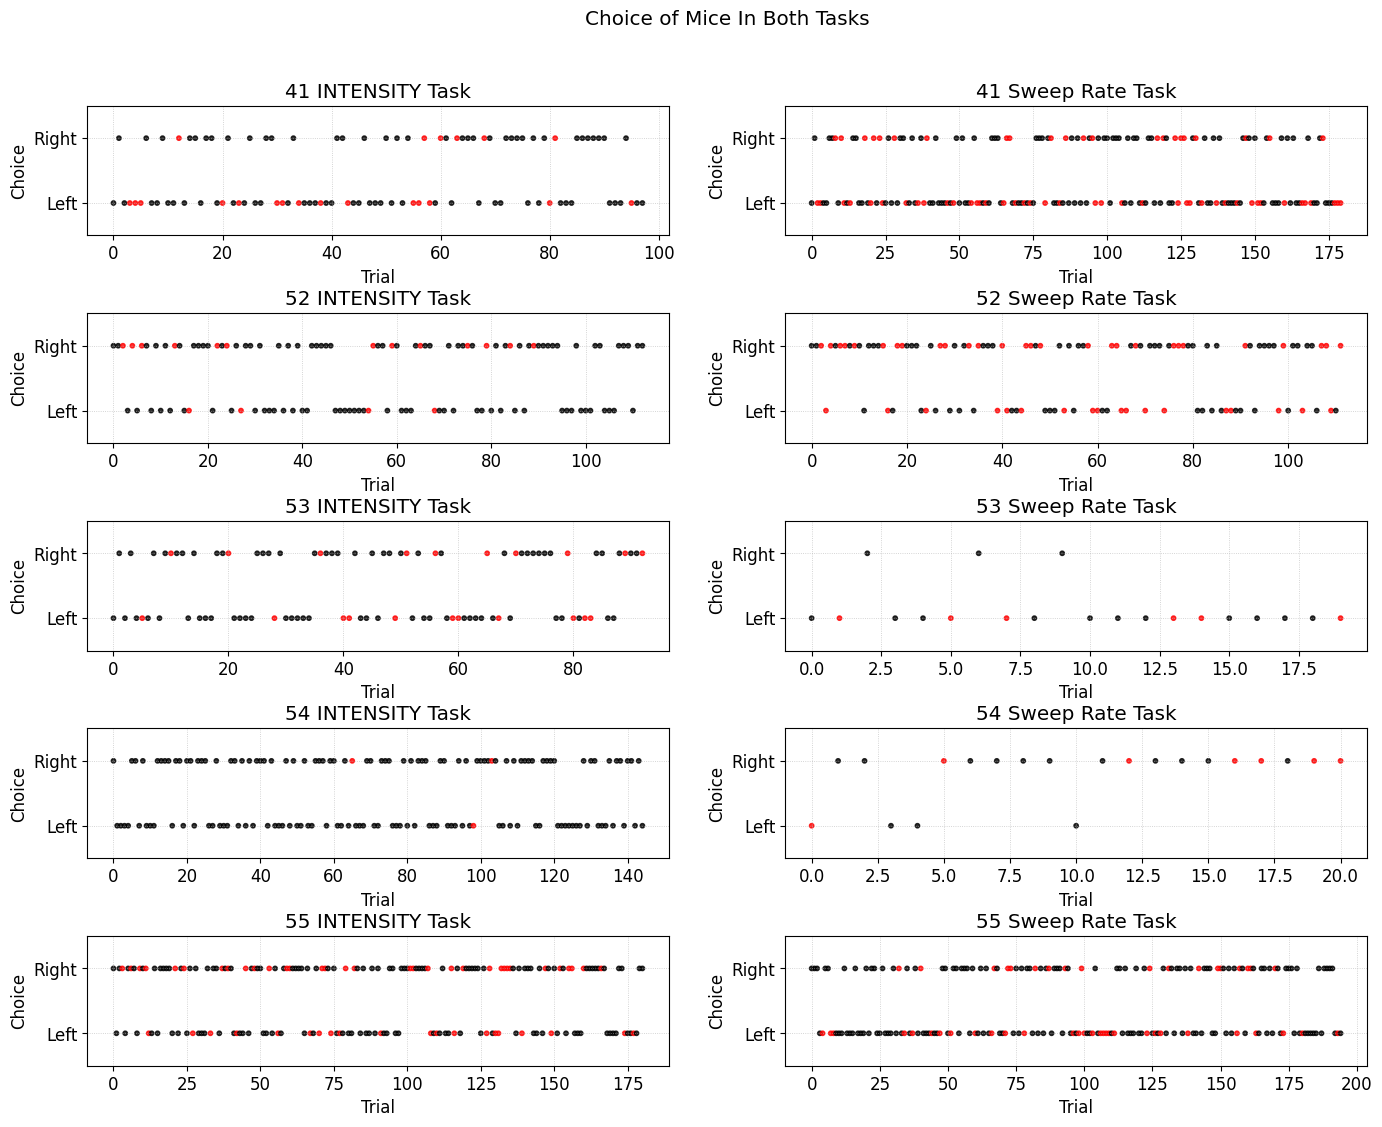

In [70]:
matplotlib.rcParams['font.size'] = 12

fig = plt.figure(figsize=(16, 12))
for subject_id, subject in enumerate(subject_IDs):
    
    subject_data_I = INTENSITY.loc[INTENSITY .subjects == subject].reset_index(drop=True)
    subject_data_CR = CLICKS.loc[CLICKS .subjects == subject].reset_index(drop=True)
    
    sub_i  = subject_data_I.loc[subject_data_I.day.dt.date >= day].reset_index(drop=True)
    sub_cr= subject_data_CR.loc[subject_data_CR.day.dt.date >= day].reset_index(drop=True)

    # INTENSITY task first 
    x_i = sub_i.get('trial', sub_i.index)     # default: 0, 1, 2, …
    colors_i = np.where(sub_i['outcomes'] == 1, 'black', 'red')      
    
    ax1 = plt.subplot(5, 2, subject_id * 2 + 1)                          
    ax1.scatter(x_i,
            sub_i['choices'],    
            c=colors_i,
            s=10,
            alpha=0.8)

    ax1.set_yticks([23, 24])
    ax1.set_yticklabels(['Left', 'Right'])
    ax1.set_xlabel('Trial')
    ax1.set_ylabel('Choice') 
    ax1.set_ylim(22.5, 24.5)                  # add a little padding so dots aren’t on the frame
    ax1.grid(True, axis='both', linestyle=':', linewidth=0.6, alpha=0.7)
    ax1.set_title(f'{str(subject)[-2:]} INTENSITY Task')

    # click rate task
    x_cr = sub_cr.get('trial', sub_cr.index)     # default: 0, 1, 2, …
    colors_cr= np.where(sub_cr['outcomes'] == 1, 'black', 'red')      
    ax2 = plt.subplot(5, 2, subject_id * 2 + 2)                          
    ax2.scatter(x_cr,
            sub_cr['choices'],    
            c=colors_cr,
            s=10,
            alpha=0.8)

    ax2.set_yticks([23, 24])
    ax2.set_yticklabels(['Left', 'Right'])
    ax2.set_xlabel('Trial')
    ax2.set_ylabel('Choice') 
    ax2.set_ylim(22.5, 24.5)                  # add a little padding so dots aren’t on the frame
    ax2.grid(True, axis='both', linestyle=':', linewidth=0.6, alpha=0.7)
    ax2.set_title(f'{str(subject)[-2:]} Sweep Rate Task')

plt.suptitle('Choice of Mice In Both Tasks')
plt.subplots_adjust(
    hspace=0.6,    # increase vertical padding between rows
    wspace=0.2,    # horizontal padding (if multiple columns)
    top=0.9,       # leave 10% space at top
    bottom=0.1,    # leave 10% space at bottom
    left=0.1,      # 10% margin on left
    right=0.9      # 10% margin on right
)


**Plot Choice separately for context-dependent and -invariant stimuli**

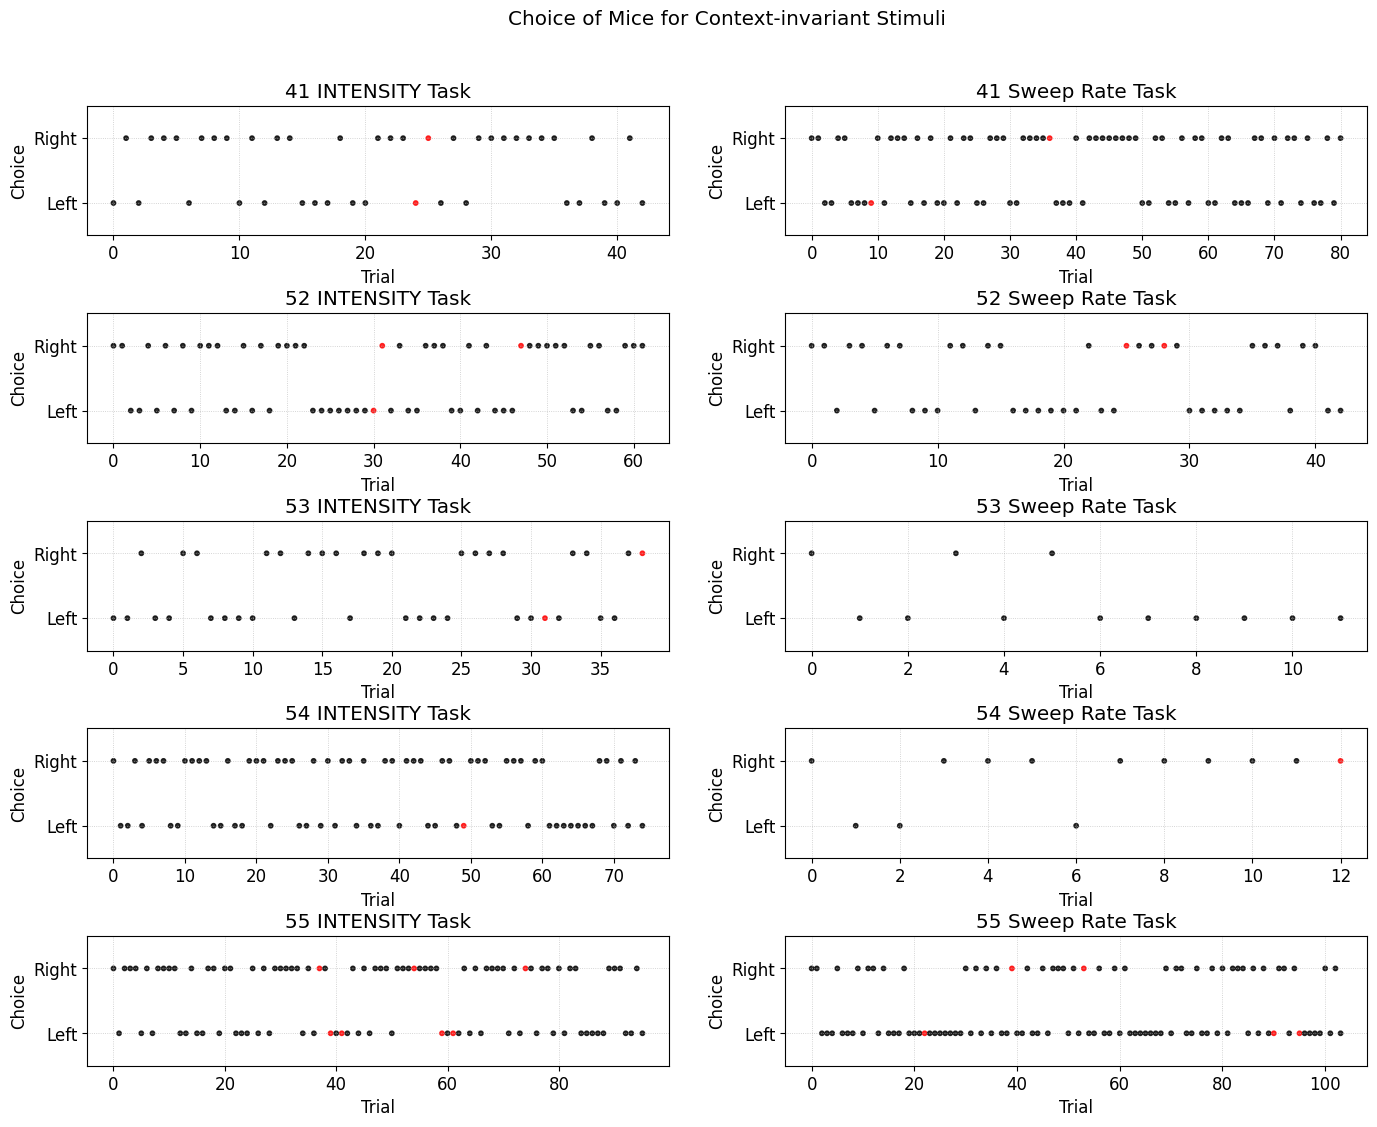

In [ ]:
matplotlib.rcParams['font.size'] = 12

fig = plt.figure(figsize=(16, 12))
for subject_id, subject in enumerate(subject_IDs):
    
    subject_data_I = INVARIANT_INTENSITY.loc[INVARIANT_INTENSITY .subjects == subject].reset_index(drop=True)
    subject_data_CR = INVARIANT_CLICKS.loc[INVARIANT_CLICKS .subjects == subject].reset_index(drop=True)
    
    sub_i  = subject_data_I.loc[subject_data_I.day.dt.date >= day].reset_index(drop=True)
    sub_cr= subject_data_CR.loc[subject_data_CR.day.dt.date >= day].reset_index(drop=True)

    # INTENSITY task first 
    x_i = sub_i.get('trial', sub_i.index)     # default: 0, 1, 2, …
    colors_i = np.where(sub_i['outcomes'] == 1, 'black', 'red')      
    
    ax1 = plt.subplot(5, 2, subject_id * 2 + 1)                          
    ax1.scatter(x_i,
            sub_i['choices'],    
            c=colors_i,
            s=10,
            alpha=0.8)

    ax1.set_yticks([23, 24])
    ax1.set_yticklabels(['Left', 'Right'])
    ax1.set_xlabel('Trial')
    ax1.set_ylabel('Choice') 
    ax1.set_ylim(22.5, 24.5)                  # add a little padding so dots aren’t on the frame
    ax1.grid(True, axis='both', linestyle=':', linewidth=0.6, alpha=0.7)
    ax1.set_title(f'{str(subject)[-2:]} INTENSITY Task')

    # click rate task
    x_cr = sub_cr.get('trial', sub_cr.index)     # default: 0, 1, 2, …
    colors_cr= np.where(sub_cr['outcomes'] == 1, 'black', 'red')      
    ax2 = plt.subplot(5, 2, subject_id * 2 + 2)                          
    ax2.scatter(x_cr,
            sub_cr['choices'],    
            c=colors_cr,
            s=10,
            alpha=0.8)

    ax2.set_yticks([23, 24])
    ax2.set_yticklabels(['Left', 'Right'])
    ax2.set_xlabel('Trial')
    ax2.set_ylabel('Choice') 
    ax2.set_ylim(22.5, 24.5)                  # add a little padding so dots aren’t on the frame
    ax2.grid(True, axis='both', linestyle=':', linewidth=0.6, alpha=0.7)
    ax2.set_title(f'{str(subject)[-2:]} Sweep Rate Task')

plt.suptitle('Choice of Mice for Context-invariant Stimuli')
plt.subplots_adjust(
    hspace=0.6,    # increase vertical padding between rows
    wspace=0.2,    # horizontal padding (if multiple columns)
    top=0.9,       # leave 10% space at top
    bottom=0.1,    # leave 10% space at bottom
    left=0.1,      # 10% margin on left
    right=0.9      # 10% margin on right
)


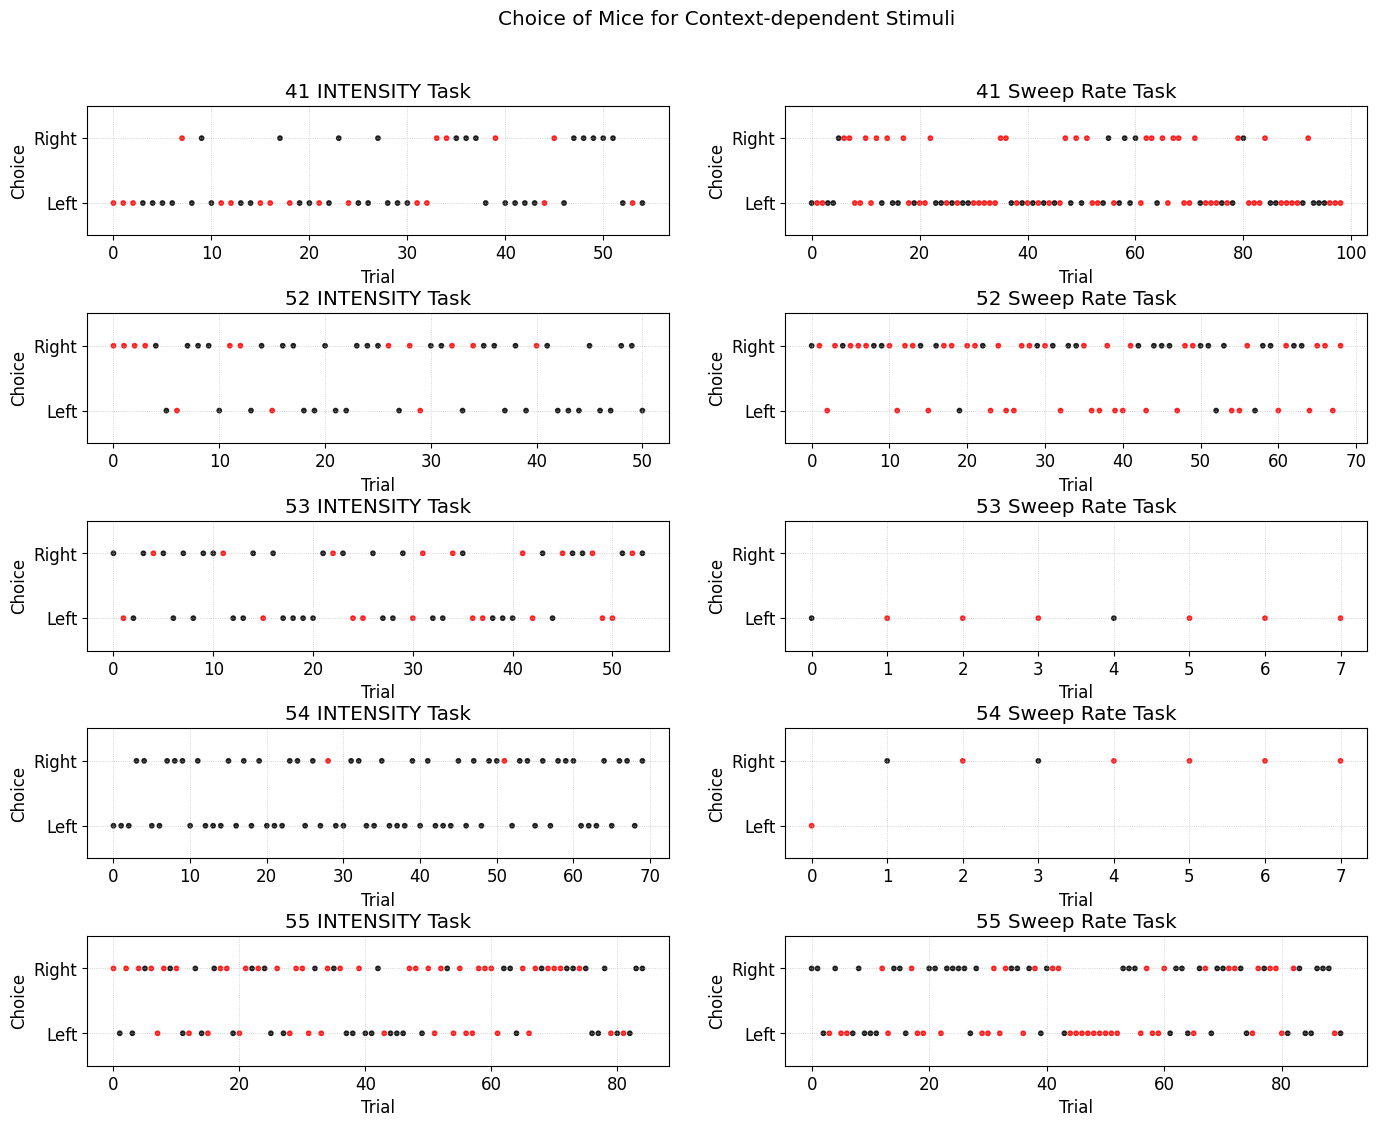

In [56]:
matplotlib.rcParams['font.size'] = 12

fig = plt.figure(figsize=(16, 12))
for subject_id, subject in enumerate(subject_IDs):
    
    subject_data_I = DEPENDENT_INTENSITY.loc[DEPENDENT_INTENSITY .subjects == subject].reset_index(drop=True)
    subject_data_CR = DEPENDENT_CLICKS.loc[DEPENDENT_CLICKS .subjects == subject].reset_index(drop=True)
    
    sub_i  = subject_data_I.loc[subject_data_I.day.dt.date >= day].reset_index(drop=True)
    sub_cr= subject_data_CR.loc[subject_data_CR.day.dt.date >= day].reset_index(drop=True)

    # INTENSITY task first 
    x_i = sub_i.get('trial', sub_i.index)     # default: 0, 1, 2, …
    colors_i = np.where(sub_i['outcomes'] == 1, 'black', 'red')      
    
    ax1 = plt.subplot(5, 2, subject_id * 2 + 1)                          
    ax1.scatter(x_i,
            sub_i['choices'],    
            c=colors_i,
            s=10,
            alpha=0.8)

    ax1.set_yticks([23, 24])
    ax1.set_yticklabels(['Left', 'Right'])
    ax1.set_xlabel('Trial')
    ax1.set_ylabel('Choice') 
    ax1.set_ylim(22.5, 24.5)                  # add a little padding so dots aren’t on the frame
    ax1.grid(True, axis='both', linestyle=':', linewidth=0.6, alpha=0.7)
    ax1.set_title(f'{str(subject)[-2:]} INTENSITY Task')

    # click rate task
    x_cr = sub_cr.get('trial', sub_cr.index)     # default: 0, 1, 2, …
    colors_cr= np.where(sub_cr['outcomes'] == 1, 'black', 'red')      
    ax2 = plt.subplot(5, 2, subject_id * 2 + 2)                          
    ax2.scatter(x_cr,
            sub_cr['choices'],    
            c=colors_cr,
            s=10,
            alpha=0.8)

    ax2.set_yticks([23, 24])
    ax2.set_yticklabels(['Left', 'Right'])
    ax2.set_xlabel('Trial')
    ax2.set_ylabel('Choice') 
    ax2.set_ylim(22.5, 24.5)                  # add a little padding so dots aren’t on the frame
    ax2.grid(True, axis='both', linestyle=':', linewidth=0.6, alpha=0.7)
    ax2.set_title(f'{str(subject)[-2:]} Sweep Rate Task')

plt.suptitle('Choice of Mice for Context-dependent Stimuli')
plt.subplots_adjust(
    hspace=0.6,    # increase vertical padding between rows
    wspace=0.2,    # horizontal padding (if multiple columns)
    top=0.9,       # leave 10% space at top
    bottom=0.1,    # leave 10% space at bottom
    left=0.1,      # 10% margin on left
    right=0.9      # 10% margin on right
)


# plot separately for context-dependent and -invariant stimuli

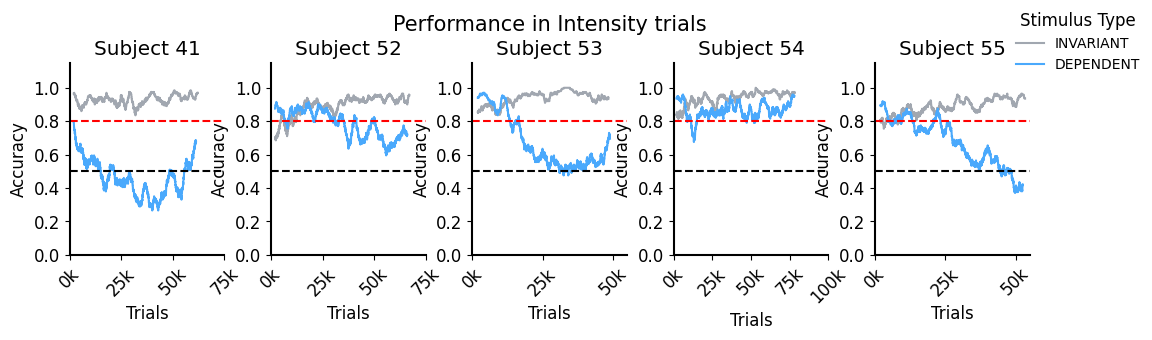

In [59]:
# plot separately for context-dependent and -invariant stimuli in INTENSITY trials
fig = plt.figure(figsize=(12, 6))
matplotlib.rcParams['font.size'] = 12
idx = 1
for subject in subject_IDs:
    ax = plt.subplot(2, 5, idx)
    sub_inv_intensity = INVARIANT_INTENSITY.loc[INVARIANT_INTENSITY.subjects == subject].reset_index(drop=True)
    sub_inv_intensity.outcomes.rolling(roll_size).mean().plot(ax=ax,label="INVARIANT", color=colors[3])
    sub_dep_intensity = DEPENDENT_INTENSITY.loc[DEPENDENT_INTENSITY.subjects == subject].reset_index(drop=True)
    sub_dep_intensity.outcomes.rolling(roll_size).mean().plot(ax=ax,label="DEPENDENT", color=colors[2])
    plt.title(f'Subject {str(subject)[-2:]}')
    idx += 1
    ax.axhline(0.8, color='red', ls='--')
    ax.axhline(0.5, color='black', ls='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    x_max = max(len(sub_inv_intensity), len(sub_dep_intensity))
    if x_max < 5500:
        lim_x = 5500
    else:
        lim_x = math.ceil(x_max / 2500) * 2500
    ax.set_xlim(0, lim_x) 
    ax.set_xticks(np.arange(0, lim_x+1, 2500))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: f'{x/100:.0f}k'))
    # last_tick  = ax.xaxis.get_major_ticks()[-1]   # grab final Tick object
    # last_tick.set_visible(False)
    ax.set_ylim(0, 1.15)  
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Trials')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


plt.subplots_adjust(
    hspace=0.5,    # increase vertical padding between rows
    wspace=0.3,    # horizontal padding (if multiple columns)
    top=0.9,       # leave 10% space at top
    bottom=0.1,    # leave 10% space at bottom
    left=0.1,      # 10% margin on left
    right=0.9      # 10% margin on right
)
plt.suptitle('Performance in Intensity trials', fontsize=15)
# collect handles + labels from the last axes (or any one axes—it’s the same labels)
handles, labels = ax.get_legend_handles_labels()

# add a single legend for the whole figure
fig.legend(
    handles,
    labels,
    loc='upper right',    # position above all subplots
    ncol=1,                # number of columns in the legend
    title='Stimulus Type',
    fontsize = 10,
    frameon = False
)
plt.show()

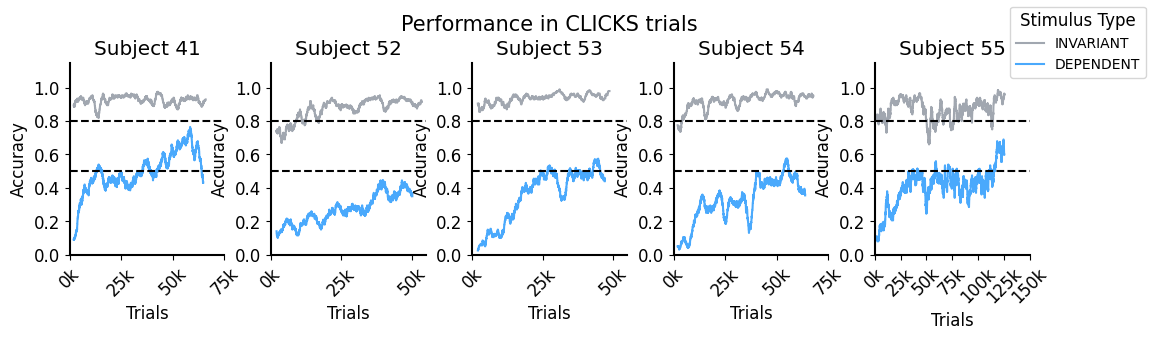

In [60]:
# # plot separately for context-dependent and -invariant stimuli in CLICKS trials
fig = plt.figure(figsize=(12, 6))
matplotlib.rcParams['font.size'] = 12
idx = 1
for subject in subject_IDs:
    ax = plt.subplot(2, 5, idx)
    sub_inv_clicks = INVARIANT_CLICKS.loc[INVARIANT_CLICKS.subjects == subject].reset_index(drop=True)
    sub_inv_clicks.outcomes.rolling(roll_size).mean().plot(ax=ax,label="INVARIANT", color=colors[3])
    sub_dep_clicks = DEPENDENT_CLICKS.loc[DEPENDENT_CLICKS.subjects == subject].reset_index(drop=True)
    sub_dep_clicks.outcomes.rolling(roll_size).mean().plot(ax=ax,label="DEPENDENT", color=colors[2])
    plt.title(f'Subject {str(subject)[-2:]}')
    idx += 1
    ax.axhline(0.8, color='black', ls='--')
    ax.axhline(0.5, color='black', ls='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    x_max = max(len(sub_inv_clicks), len(sub_dep_clicks))
    if x_max < 5500:
        lim_x = 5500
    else:
        lim_x = math.ceil(x_max / 2500) * 2500
    ax.set_xlim(0, lim_x) 
    ax.set_xticks(np.arange(0, lim_x+1, 2500))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: f'{x/100:.0f}k'))
    ax.set_ylim(0, 1.15)  
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Trials')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


plt.subplots_adjust(
    hspace=0.5,    # increase vertical padding between rows
    wspace=0.3,    # horizontal padding (if multiple columns)
    top=0.9,       # leave 10% space at top
    bottom=0.1,    # leave 10% space at bottom
    left=0.1,      # 10% margin on left
    right=0.9      # 10% margin on right
)
plt.suptitle('Performance in CLICKS trials', fontsize=15)
# collect handles + labels from the last axes (or any one axes—it’s the same labels)
handles, labels = ax.get_legend_handles_labels()

# add a single legend for the whole figure
fig.legend(
    handles,
    labels,
    loc='upper right',    # position above all subplots
    ncol=1,                # number of columns in the legend
    title='Stimulus Type',
    fontsize=10
)
plt.show()

# Plot the swith frequency and initial performance

In [67]:
'''Helper functions'''
def process_block_data(subject_data):
    subject_data = subject_data.sort_values("times").reset_index(drop=True)
    subject_data["trial_idx"] = subject_data.index

    # (a) contiguous-block labels
    subject_data['block_id'] = subject_data['task'].ne(
        subject_data['task'].shift()
    ).cumsum()

    # (b) trial index *within* each block
    subject_data['within_block_idx'] = (
        subject_data
        .groupby('block_id')
        .cumcount()
    )

    # (c) block length for every trial 
    block_len = (
        subject_data.groupby('block_id')
        .size()
        .rename('block_len')
    )
    subject_data_processed = subject_data.join(block_len, on='block_id')
    return subject_data_processed

def boxplot_trialnum(subject_data_processed, subject, ax):
    block_len_df = (
        subject_data_processed[['task', 'block_id', 'block_len']]
        .drop_duplicates()
        .reset_index(drop=True)
    )

    Intensity_len = block_len_df.loc[block_len_df['task'] == 24, 'block_len']
    Cr_len = block_len_df.loc[block_len_df['task'] == 29, 'block_len']
    data = [Intensity_len, Cr_len]

    palette = {24: colors[0], 29: colors[1]} 

    bp = ax.boxplot(
        data,
        patch_artist=True,
        widths=0.6,
        positions=[1.0, 1.75],
        boxprops    = dict(edgecolor='black',linewidth = 1.5),
        medianprops = dict(color='black', linewidth=1.5),
        whiskerprops= dict(color='black'),
        capprops    = dict(color='black')
    )

    box_colors = [palette[24], palette[29]]
    for box, col in zip(bp['boxes'], box_colors):
        box.set_facecolor(col)
        box.set_alpha(0.8) 

    rng      = np.random.default_rng(1)
    jitter   = 0
    dot_area = 55

    # Intensity dots (blue)
    x24 = 1 + rng.uniform(-jitter, jitter, len(Intensity_len))
    ax.scatter(
        x24, Intensity_len,
        marker='o',
        s=dot_area,
        facecolors=palette[24],   # your blue
        edgecolors='black',
        linewidths=0.8,
        zorder=2
    )
    ax.set_title(f'Subject {str(subject)[-2:]}')
    # CR dots (orange)
    x29 = 1.75 + rng.uniform(-jitter, jitter, len(Cr_len))
    ax.scatter(
        x29, Cr_len,
        marker='o',
        s=dot_area,
        facecolors=palette[29],   # your orange
        edgecolors='black',
        linewidths=0.8,
        zorder=2
    )

    # ax.set_ylim([-100,750])
    ax.set_xlim([0.5, 2.1])
    ax.set_xticklabels(['Arena A', 'Arena B'], fontsize = 8)
    ax.set_ylabel('# trials before switch')
    ax.grid(axis='y', linestyle='--', alpha=0.35)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # plt.tight_layout()
    # plt.savefig('figures/switch_frequency.pdf',bbox_inches='tight')
    # plt.show()
    return Intensity_len, Cr_len
    
def trial_length_average_and_ttest(Intensity_len, Cr_len):
    t_stat, p_val = stats.ttest_ind(Intensity_len, Cr_len, equal_var=False)  # Welch’s t-test
    if p_val > 0.05:
        print(f'Subject stays in either arena does NOT significantly differ: t = {t_stat:.3f},  p = {p_val:.4f}')
    else:
        print(f'Subject stays in either arena DOES significantly differ: t = {t_stat:.3f},  p = {p_val:.4f}')
    Intensity_len_mean = np.mean(Intensity_len)
    Intensity_len_se = Intensity_len.std(ddof=1) / np.sqrt(len(Intensity_len))
    Cr_len_mean = np.mean(Cr_len)
    Cr_len_se = Cr_len.std(ddof=1) / np.sqrt(len(Cr_len))

    print(f'Intensity task on average runs for {Intensity_len_mean} trials ± {Intensity_len_se:.2f}, the range is [{min(Intensity_len)},{max(Intensity_len)}]')
    print(f'Click Rate task on average runs for {Cr_len_mean} trials ± {Cr_len_se:.2f}, the range is [{min(Cr_len)},{max(Cr_len)}]\n')

def plot_afterswitch_performance(subject_data, subject, ax, max_k = 20):
    palette = {24: colors[0], 29: colors[1]} 
    trimmed = subject_data[subject_data['within_block_idx'] < max_k].copy()

    summ = (
        trimmed
        .groupby(['task', 'within_block_idx'])['outcomes']
        .agg(mean='mean', count='count', std='std')
        .reset_index()
    )
    summ['sem'] = summ['std'] / np.sqrt(summ['count'])

    #smoothing
    for col in ['mean', 'sem']:
        summ[f'smooth_{col}'] = (
            summ
            .groupby('task')[col]
            .transform(lambda s: s.rolling(3,
                                            center=True,
                                            min_periods=1).mean())
        )

    for task_val in (24, 29):
        g  = summ[summ['task'] == task_val]
        x  = g['within_block_idx']
        m  = g['smooth_mean']
        se = g['smooth_sem']
        cur_label = 'Arena A' if task_val == 24 else 'Arena B'
        ax.plot(x, m, color=palette[task_val], label=cur_label)
        ax.fill_between(x, m - se, m + se,
                        color=palette[task_val], alpha=0.25)
    ax.set_title(f'Subject {str(subject)[-2:]}')
    ax.axhline(0.8, color='red', ls='--')
    ax.axhline(0.5, color='black', ls='--')
    ax.set_xlim(-0.5, max_k - 0.5)
    ax.set_xlabel('Trials', fontsize = 9)
    ax.set_ylabel('Accuracy',fontsize = 9)
    ax.set_ylim(0.3, 1.15)  
    ax.set_yticks(np.arange(0.4, 1.1, 0.2))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # plt.tight_layout()
    # plt.savefig('figures/after_switch_accuray.pdf',bbox_inches='tight')
    # plt.show()


Subject stays in either arena does NOT significantly differ: t = -0.352,  p = 0.7255
Intensity task on average runs for 87.39716312056737 trials +- 12.81, the range is [2,1547]
Click Rate task on average runs for 92.56737588652483 trials +- 7.23, the range is [1,532]

Subject stays in either arena does NOT significantly differ: t = 1.646,  p = 0.1010
Intensity task on average runs for 87.5657894736842 trials +- 9.46, the range is [5,1028]
Click Rate task on average runs for 68.32236842105263 trials +- 6.87, the range is [2,577]

Subject stays in either arena does NOT significantly differ: t = 0.092,  p = 0.9265
Intensity task on average runs for 83.1880341880342 trials +- 11.11, the range is [2,1084]
Click Rate task on average runs for 81.92307692307692 trials +- 8.01, the range is [1,476]

Subject stays in either arena does NOT significantly differ: t = 1.108,  p = 0.2690
Intensity task on average runs for 106.38775510204081 trials +- 12.45, the range is [4,1511]
Click Rate task on av

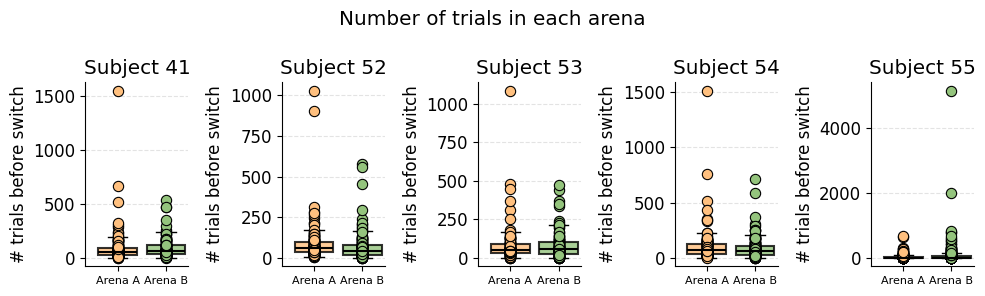

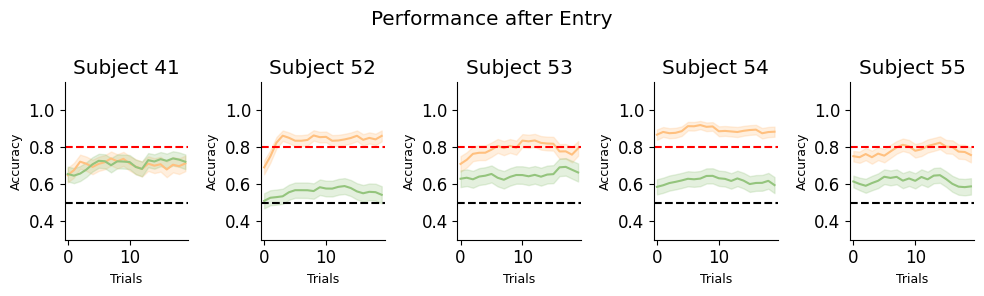

In [66]:
fig1, axgrid1 = plt.subplots(1, 5, figsize=(10, 3))   # box-plots
fig2, axgrid2 = plt.subplots(1, 5, figsize=(10, 3))   # after-switch curves

matplotlib.rcParams['font.size'] = 12
for idx, subject in enumerate(subject_IDs):
    # row, col = divmod(idx, 5)
    
    ax1   = axgrid1[idx]      
    ax2 = axgrid2[idx] 

    subject_data = ALL.loc[ALL.subjects == subject].reset_index(drop=True)
    subject_data_processed = process_block_data(subject_data)
    Intensity_len, Cr_len = boxplot_trialnum(subject_data_processed, subject, ax1)
    trial_length_average_and_ttest(Intensity_len, Cr_len)
    plot_afterswitch_performance(subject_data_processed, subject, ax2)

fig1.suptitle('Number of trials in each arena')
fig1.tight_layout()
fig2.suptitle('Performance after Entry')
fig2.tight_layout()

plt.show()